# Estudo de Caso: Regressão Linear

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Para uma variável (1D)

### Etapa 1: Entrada de Dados

In [58]:
filename = 'ex1data1.txt'
df = pd.read_csv(filename,header=None,names=['População','Lucro'])

In [59]:
df.head()

,População,Lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [60]:
df.tail()

,População,Lucro
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [61]:
varX = 'População'
varY = 'Lucro'

X = df[varX].values
y = df[varY].values
m = y.size

### Etapa 2: Visualização Inicial

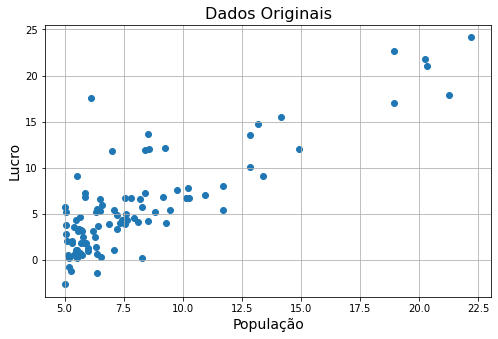

In [62]:
fig = plt.figure(figsize=(8,5))
plt.title('Dados Originais', fontsize = 16)
plt.grid()
plt.xlabel(varX, fontsize = 14)
plt.ylabel(varY, fontsize = 14)
plt.scatter(X, y)
plt.show()

### Etapa 3: Ajuste Manual

In [63]:
# Construção de X

Xn = np.ones((m,2))
Xn[:,1] = X
X = Xn
print(X[:5,:])

# X      *    w       =   yest
# m x 2       2 x 1       m x 1

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [64]:
# Construção de y

yn = np.zeros((m,1))
yn[:,0] = y
y = yn
print(y[:5])

# y
# m x 1

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


In [65]:
# Construção de w

w = np.array([[y.mean(),0]]).T
w = np.array([[-1.0,1.0]]).T
print(w)

[[-1.]
 [ 1.]]


In [66]:
yest = X.dot(w) # yest = X * w

In [67]:
print(y[:5])

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


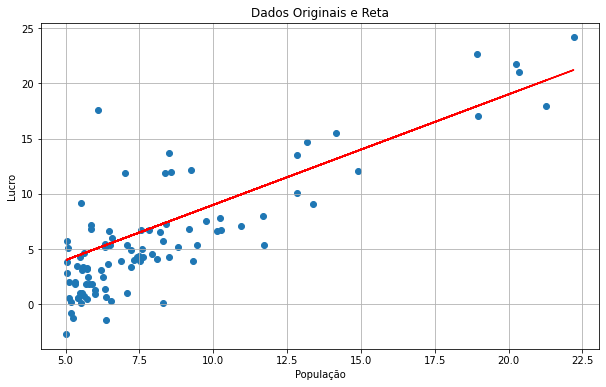

In [68]:
fig = plt.figure(figsize=(10,6))
plt.title(f'Dados Originais e Reta')
plt.grid()
plt.xlabel(varX)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')
plt.show()

### Etapa 4: Função de Perdas

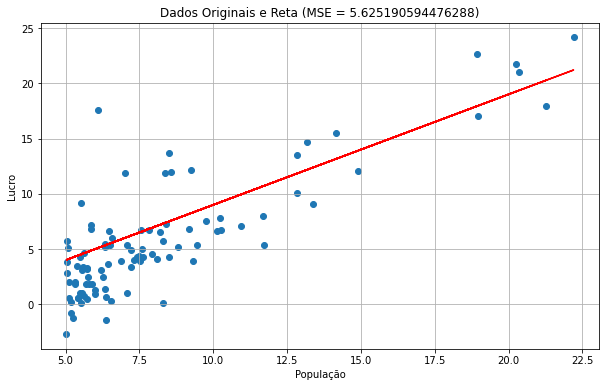

In [69]:
w = np.array([[-1.0,1.0]]).T

yest = X.dot(w)
erro = yest - y
fp = (erro**2).mean()/2

fig = plt.figure(figsize=(10,6))
plt.title(f'Dados Originais e Reta (MSE = {fp})')
plt.grid()
plt.xlabel(varX)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')
plt.show()

### Etapa 5: Gradient Descent

In [70]:
def calcula_Jw(X, y, w):
  yest = X.dot(w)
  erro = yest - y
  return (erro**2).mean()/2

In [71]:
def calcula_iteracoes_GD(X, y, w, alpha, iters):
  m = y.size
  mem_Jw = np.zeros((iters,1))
  
  for iter in range(iters):
    yest = X.dot(w)
    w = w - (alpha/m) * (X.T).dot(yest - y)
    mem_Jw[iter] = calcula_Jw(X, y, w)
    
  return w, mem_Jw

In [72]:
# Teste

w = np.array([[y.mean(),0]]).T
alpha = 0.02
iters = 2000
w,mem_Jw = calcula_iteracoes_GD(X, y, w, alpha, iters)
print(f'w = \n{w}')

w = 
[[-3.88866551]
 [ 1.19231883]]


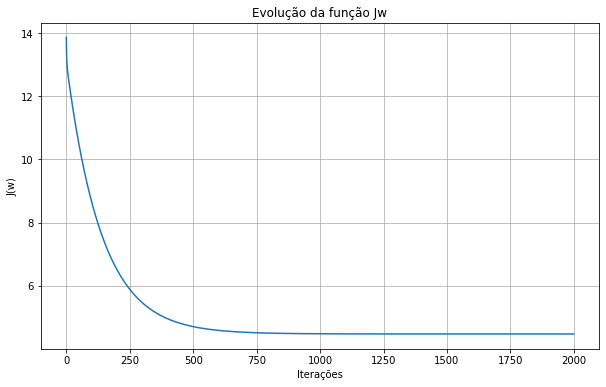

In [73]:
# Evolução

fig = plt.figure(figsize=(10,6))
plt.title(f'Evolução da função Jw')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('J(w)')
plt.plot(range(iters), mem_Jw)
plt.show()

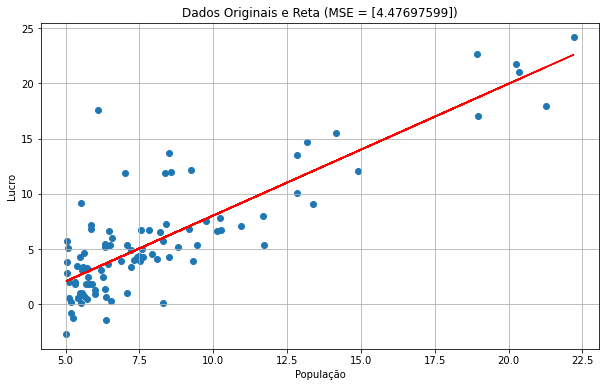

In [74]:
# Resposta obtida
# 1000 => 0.01
#  600 => 0.02

yest = X.dot(w)

fig = plt.figure(figsize=(10,6))
plt.title(f'Dados Originais e Reta (MSE = {mem_Jw[-1]})')
plt.grid()
plt.xlabel(varX)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')
plt.show()